# HW2 - Doing Excel work with Python - Analysis 1 - PDalvi

After successfully creating the folder structure using the cookiecutter-datascience-simple template and applying version control on the files, we start by importing the libraries needed for the analysis 1 of the HW2.

In [1]:
import copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


from whatif import Model
from whatif import get_sim_results_df

In [2]:
%matplotlib inline

Next, we assign all the values to the respective variables as mentioned in the problem statement, and create the formulas for demand, order cost, sales revenue and profit, just to check and understand how the function given for demand works and if the answers match with the approximate values given to test. 

In [3]:
fixed_cost = 5000
unit_variable_cost = 100
selling_price = 115
spf_constant = 4900
spf_linear = -35
spf_quadratic = 0.06

In [4]:
Demand = (0.06 * (selling_price ** 2)) - (35 * (selling_price)) + 4900
Demand

1668.5

In [5]:
order_cost = fixed_cost + (Demand * unit_variable_cost)
print(order_cost)

sales_revenue = Demand * selling_price
print(sales_revenue)

profit = sales_revenue - order_cost
print(profit)

171850.0
191877.5
20027.5


### Base Model

Now, we know that all our calculation are correct, we move to building the OO-model for our problem with the required functions to calculate, demand, order_cost, sales_revenue, profit and to update parameter incase needed.

In [6]:
class SingleProductSPF(Model):
    """Base Model"""
    def __init__(self, fixed_cost = 5000, unit_variable_cost = 100, selling_price = 115, spf_constant = 4900, spf_linear = -35, spf_quadratic = 0.06):
        self.fixed_cost = fixed_cost
        self.unit_variable_cost = unit_variable_cost
        self.selling_price = selling_price
        self.spf_constant = spf_constant
        self.spf_linear = spf_linear
        self.spf_quadratic = spf_quadratic
        
    def update(self, param_dict):
        """
        Update parameter values
        """
        for key in param_dict:
            setattr(self, key, param_dict[key])
        
    def demand(self):
        """Compute total demand"""
        return self.spf_quadratic * (self.selling_price ** 2) + self.spf_linear * self.selling_price + self.spf_constant

    def order_cost(self):
        """Compute total order cost"""
        return self.fixed_cost + (self.demand() * self.unit_variable_cost)
    
    def sales_revenue(self):
        """Compute sales revenue"""
        return self.demand() * self.selling_price

    def profit(self):
        '''
        Compute profit
        '''
        profit = self.sales_revenue() - self.order_cost()
        return profit
    def __str__(self):
        """
        String representation of bookstore inputs
        """
        return str(vars(self))
    

In [7]:
model_1 = SingleProductSPF(fixed_cost, unit_variable_cost, selling_price, spf_constant, spf_linear, spf_quadratic)

We created the our model needed and an instance of our model. Below, we are checking the values from our respective function and they match with our manual calculations at the start of the program.

In [8]:
print(model_1.demand())
print(model_1.order_cost())
print(model_1.sales_revenue())
print(model_1.profit())

1668.5
171850.0
191877.5
20027.5


### One-Way Data table

For creating a one-way datatable, we have created a new instance of our base model and created and array of selling price range from 80 to 140 in steps of 10.

In [9]:
# Set property equal to an array
model_2 = SingleProductSPF(fixed_cost, unit_variable_cost, selling_price, spf_constant, spf_linear, spf_quadratic)
selling_price_range = np.arange(80, 141, 10)
model_2.selling_price = selling_price_range
model_2.selling_price

array([ 80,  90, 100, 110, 120, 130, 140])

In [10]:
print(model_2)

{'fixed_cost': 5000, 'unit_variable_cost': 100, 'selling_price': array([ 80,  90, 100, 110, 120, 130, 140]), 'spf_constant': 4900, 'spf_linear': -35, 'spf_quadratic': 0.06}


In [11]:
print(model_2.demand())
print(model_2.order_cost())
print(model_2.sales_revenue())
print(model_2.profit())

[2484. 2236. 2000. 1776. 1564. 1364. 1176.]
[253400. 228600. 205000. 182600. 161400. 141400. 122600.]
[198720. 201240. 200000. 195360. 187680. 177320. 164640.]
[-54680. -27360.  -5000.  12760.  26280.  35920.  42040.]


For creating the datatable we use the data_table function from the whatif package.

In [12]:
dt_param_ranges_1 = {'selling_price': np.arange(80, 141, 10)}

# Specify desired outputs (list)
outputs = ['profit', 'demand']

# Use data_table function to create 1-way data table
m2_dt1_df = model_2.data_table(dt_param_ranges_1, outputs)
m2_dt1_df

,selling_price,profit,demand
0,80,-54680.0,2484.0
1,90,-27360.0,2236.0
2,100,-5000.0,2000.0
3,110,12760.0,1776.0
4,120,26280.0,1564.0
5,130,35920.0,1364.0
6,140,42040.0,1176.0


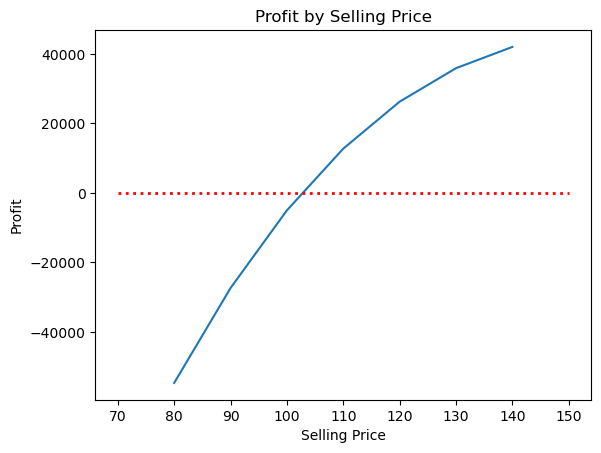

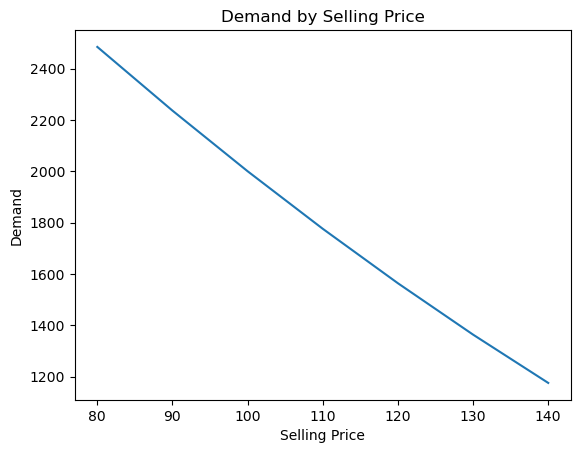

In [14]:
plt.plot(m2_dt1_df['selling_price'], m2_dt1_df['profit'])
plt.xlabel('Selling Price')
plt.ylabel('Profit')
plt.title('Profit by Selling Price')
plt.hlines(y=0.2, xmin=70, xmax=150, linewidth=2, color='r', linestyles='dotted')
#plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show() # Depending on whether you use IPython or interactive mode, etc.

plt.plot(m2_dt1_df['selling_price'], m2_dt1_df['demand'])
plt.xlabel('Selling Price')
plt.ylabel('Demand')
plt.title('Demand by Selling Price')
#plt.hlines(y=0.2, xmin=70, xmax=150, linewidth=2, color='r')
plt.show() # Depending on whether you use IPython or interactive mode, etc.



From both the above graphs of Profit by Selling price and Demand by Selling price, we can see that the profit increases as the Selling price increases whereas the demand decreased with the increase in selling price. The graph of profit by selling price is not linear and the shape of the graph is due to the polynomial function (equation) of the demand.

### Break-Even value

To find the break-even value for our selling-price, we again use the goal_seek function provided in the whatif package, and by using it we get the breakeven selling price value of 102.57 dollars to achieve profit of 0 dollars.


In [15]:
model_2.goal_seek('profit', 0, 'selling_price', 80, 140, N=100)

102.57578606424767

### Two-Way Data table

We continue our analysis further to build a 2-way data table with selling price range from 80 to 140 in steps of 10 and variable production cost from 85 to 110 in steps of 5. We are storing the datatable in m2_dt2_df and displaying the 2-way datatable.

In [16]:
dt_param_ranges_2 = {'selling_price' : np.arange(80, 141, 10),
                    'unit_variable_cost' : np.arange(85, 111, 5)}

# Specify desired outputs (list)
outputs = ['profit', 'demand']

# Use data_table function to create 1-way data table

m2_dt2_df = model_2.data_table(dt_param_ranges_2, outputs)
m2_dt2_df


,selling_price,unit_variable_cost,profit,demand
0,80,85,-17420.0,2484.0
1,80,90,-29840.0,2484.0
2,80,95,-42260.0,2484.0
3,80,100,-54680.0,2484.0
4,80,105,-67100.0,2484.0
5,80,110,-79520.0,2484.0
6,90,85,6180.0,2236.0
7,90,90,-5000.0,2236.0
8,90,95,-16180.0,2236.0
9,90,100,-27360.0,2236.0


Below, graph of Profit by selling price by unit variable cost, shows that as the selling price increase profit increases, however, with the increase in the variable cost profit decreases.

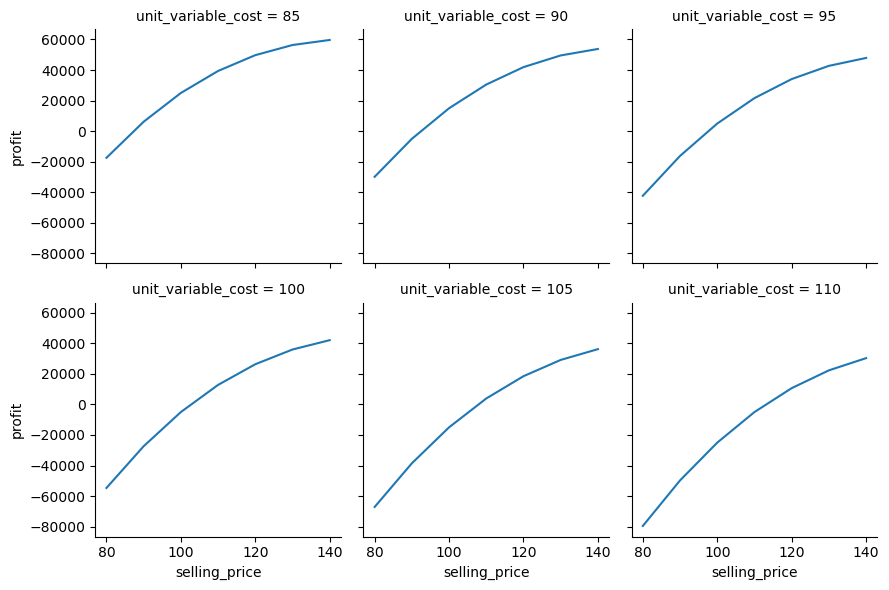

In [17]:
profit_dt_g = sns.FacetGrid(m2_dt2_df, col="unit_variable_cost", sharey=True, col_wrap=3)
profit_dt_g = profit_dt_g.map(plt.plot, "selling_price", "profit")

### Digging Deeper

Next, we are changing our selling price range from 80 to 250 in steps of 10 

In [18]:
dt_param_ranges_3 = {'selling_price': np.arange(80, 251, 10)}

# Specify desired outputs (list)
outputs = ['profit', 'demand']

# Use data_table function to create 1-way data table

m6_dt3_df = model_2.data_table(dt_param_ranges_3, outputs)
m6_dt3_df


,selling_price,profit,demand
0,80,-54680.0,2484.0
1,90,-27360.0,2236.0
2,100,-5000.0,2000.0
3,110,12760.0,1776.0
4,120,26280.0,1564.0
5,130,35920.0,1364.0
6,140,42040.0,1176.0
7,150,45000.0,1000.0
8,160,45160.0,836.0
9,170,42880.0,684.0


With the increase of selling price, demand decreases and evenutally the sales revenue decreases which causes the profit to decrease as well. 

Goal seek failed because there are 2 points on the graph when the profit is hitting 0 and goal_seek is not sure which breakeven point to select as the bisection method in our goal seek function is failing.

In [19]:
model_2.goal_seek('profit', 0, 'selling_price', 80, 250, N=100)

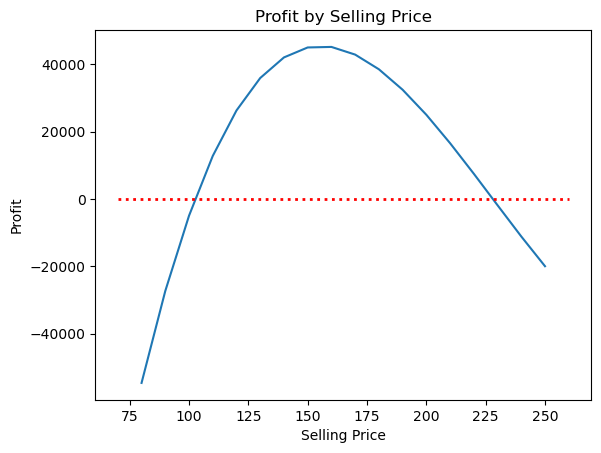

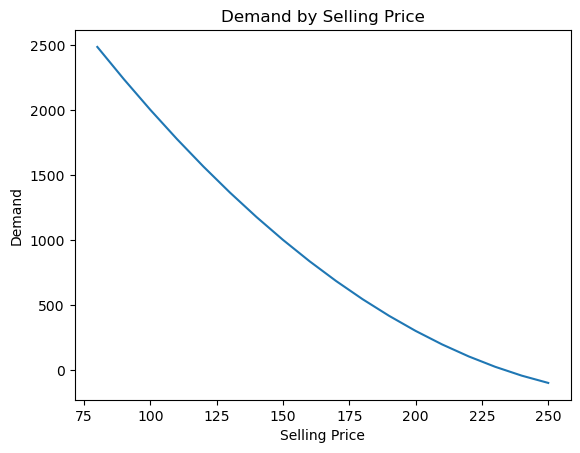

In [20]:
plt.plot(m6_dt3_df['selling_price'], m6_dt3_df['profit'])
plt.xlabel('Selling Price')
plt.ylabel('Profit')
plt.title('Profit by Selling Price')
plt.hlines(y=0.2, xmin=70, xmax=260, linewidth=2, color='r', linestyles='dotted')
#plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show() # Depending on whether you use IPython or interactive mode, etc.

plt.plot(m6_dt3_df['selling_price'], m6_dt3_df['demand'])
plt.xlabel('Selling Price')
plt.ylabel('Demand')
plt.title('Demand by Selling Price')
#plt.hlines(y=0.2, xmin=70, xmax=150, linewidth=2, color='r')
plt.show() # Depending on whether you use IPython or interactive mode, etc.

### Simulation

Next we are adding some uncertainty to the variable cost, by using uniform distribution between 80 to 120.


In [21]:
from numpy.random import default_rng
rg = default_rng(4470)
rand_UVC = rg.uniform(80, 120, 1000)
rand_UVC = np.around(rg.uniform(80, 120, 1000))

rand_UVC[:10]


array([ 98., 116.,  95., 114.,  81.,  93., 115.,  88., 106.,  81.])

<class 'scipy.stats._distn_infrastructure.rv_frozen'>


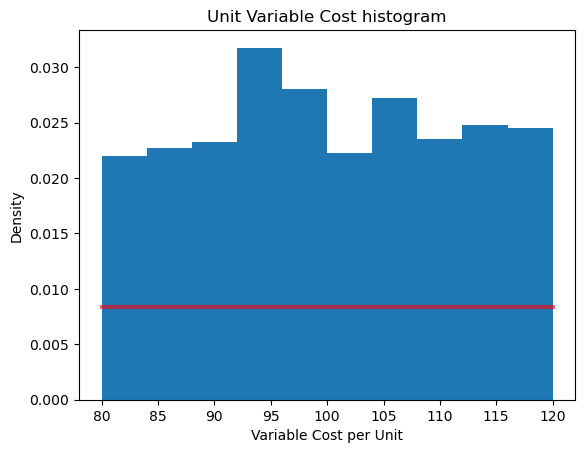

In [22]:

from scipy.stats import uniform

rv_uniform = uniform(loc=80, scale=120)
print(type(rv_uniform))

plt.title("Unit Variable Cost histogram")
plt.xlabel("Variable Cost per Unit")
plt.ylabel("Density")
plt.hist(rand_UVC, density=True);

#x_uniform = np.linspace(rv_uniform.ppf(0.0001), rv_uniform.ppf(0.999), 500)

x_uniform = np.linspace(80, 120, 100)

plt.plot(x_uniform, rv_uniform.pdf(x_uniform),
       'r-', lw=3, alpha=0.6, label='Uniform pdf');

In [23]:
#model_2.simulate?

fixed_cost = 5000
unit_variable_cost = 100
selling_price = 115
spf_constant = 4900
spf_linear = -35
spf_quadratic = 0.06
random_inputs = {'unit_variable_cost': rg.uniform(80, 120, 100)}

model_3 = SingleProductSPF(fixed_cost, unit_variable_cost, selling_price, spf_constant, spf_linear, spf_quadratic)

sim_outputs = ['profit']

In [24]:
model_3_result = model_3.simulate(random_inputs, sim_outputs)

In [25]:
model_3_result

[{'scenario_base_vals': {'fixed_cost': 5000,
   'unit_variable_cost': 100,
   'selling_price': 115,
   'spf_constant': 4900,
   'spf_linear': -35,
   'spf_quadratic': 0.06},
  'scenario_num': 0,
  'scenario_vals': {},
  'output': {'profit': array([ 1.36714305e+04,  1.49620559e+04,  4.98166634e+04,  4.30978887e+04,
          -4.54580696e+03, -7.29377705e+03, -1.73658913e+03, -4.13043211e+03,
           2.58964554e+04,  2.37328799e+04,  3.78042946e+04,  5.40098947e+02,
           4.41521092e+04,  9.33297391e+03, -3.06044140e+03,  2.80935293e+04,
           5.68463615e+03,  5.59147714e+03,  5.32244160e+04,  4.84171182e+04,
           4.90576678e+04,  4.99118221e+04,  1.08019862e+04,  5.00711783e+04,
           4.43039471e+03,  2.23820799e+04, -9.97248183e+03,  1.79595247e+04,
           1.58191962e+04,  2.23431202e+04, -9.76951356e+03,  4.27056114e+04,
           1.01545503e+04,  2.47460981e+04,  3.00414678e+04,  3.29393833e+04,
           3.32287866e+04,  1.19420156e+04, -6.42961778e+03,

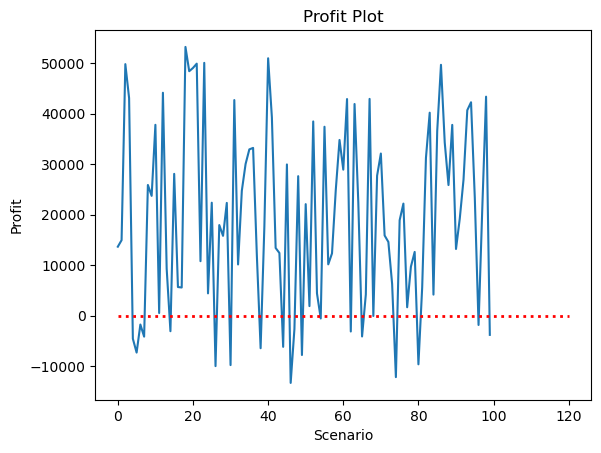

In [26]:
model3_results_df = get_sim_results_df(model_3_result)
model3_results_df

plt.plot(model3_results_df['profit'])
plt.xlabel('Scenario')
plt.ylabel('Profit')
plt.title('Profit Plot')
plt.hlines(y=0.2, xmin=0, xmax=120, linewidth=2, color='r', linestyles='dotted')
#plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show() # Depending on whether you use IPython or interactive mode, etc.


In [27]:
model3_results_df

,profit,scenario_num
0,13671.430469,0
1,14962.055924,0
2,49816.663375,0
3,43097.888685,0
4,-4545.806964,0
...,...,...
95,23396.509740,0
96,-1825.394396,0
97,21383.145414,0
98,43375.421825,0


#### Histogram of profit with uniform distribution of variable cost.

Text(0.5, 1.0, 'Profit Histogram')

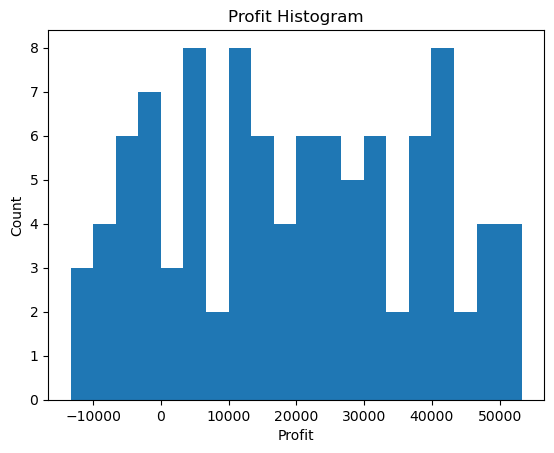

In [28]:
plt.hist(model3_results_df['profit'], bins=20)
plt.xlabel('Profit')
plt.ylabel('Count')
plt.title('Profit Histogram')

#### Probability of profit being negative (less than 0)

In [29]:
from scipy import stats

print(stats.percentileofscore(model3_results_df['profit'], 0) / 100.0)

0.2


Probability that profit is negative based on our simulation is 20%